In [247]:
#Loading the dataset

import pandas as pd
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


data = pd.read_csv('comp_file_q2.csv', parse_dates=['created_at','last_login_at','offer_started',
                                                    'offer_ended','Offer_expires','offer_completed'])
data.head(5)

,user_id,app_id,created_at,last_login_at,offer_id,Offer_status,offer_started,offer_ended,Offer_expires,reward_id,offer_completed,label_in_english,total_payout_in_paise,total_revenue_in_paise
0,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,sikka,2022-11-26,2022-11-29,3529,ONGOING,2022-11-29 01:14:50.965031+00:00,NaT,2022-11-30 18:29:59+00:00,935,2022-11-26,Complete Registration,200,0
1,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,sikka,2022-11-26,2022-11-29,3479,ONGOING,2022-11-29 07:46:21.644530+00:00,NaT,2022-12-01 07:46:21.677847+00:00,935,2022-11-26,Complete Registration,200,0
2,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,sikka,2022-11-26,2022-11-29,3549,ONGOING,2022-11-29 08:01:03.045611+00:00,NaT,2022-12-01 08:01:03.050394+00:00,935,2022-11-26,Complete Registration,200,0
3,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,sikka,2022-11-26,2022-11-29,3443,COMPLETED,2022-11-28 08:02:55.130103+00:00,2022-11-28 08:06:39.074543+00:00,NaT,935,2022-11-26,Complete Registration,200,0
4,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,sikka,2022-11-26,2022-11-29,3431,ONGOING,2022-11-28 08:01:56.418620+00:00,NaT,2022-11-30 08:01:56.422570+00:00,935,2022-11-26,Complete Registration,200,0


In [248]:
data.shape

(1000, 14)

We have 1000 records and 14 features.

Dividing the datetime columns into meaningful data.

In [249]:
#extracting features from 'account created date column'

data['acc_created_Year'] = pd.to_datetime(data['created_at']).dt.year

data['acc_created_Month'] = pd.to_datetime(data['created_at']).dt.month

data['acc_created_Day'] = pd.to_datetime(data['created_at']).dt.day



#extracting date features from date "last login column"

data['last_login_Year'] = pd.to_datetime(data['last_login_at']).dt.year

data['last_login_Month'] = pd.to_datetime(data['last_login_at']).dt.month

data['last_login_Day'] = pd.to_datetime(data['last_login_at']).dt.day

#extracting date features from date "offer completed column"

data['offer_completed_Year'] = pd.to_datetime(data['offer_completed']).dt.year

data['offer_completed_Month'] = pd.to_datetime(data['offer_completed']).dt.month

data['offer_completed_Day'] = pd.to_datetime(data['offer_completed']).dt.day




In [250]:
#User defined function.
import numpy as np

def extract_date_features(df,column):
    
    df[column+'_date'] = pd.to_datetime(df[column]).dt.date
    df[column+'_Year'] = pd.to_datetime(df[column]).dt.year

    df[column+'_Month'] = pd.to_datetime(df[column]).dt.month

    df[column+'_Day'] = pd.to_datetime(df[column]).dt.day
    df[column+'_time'] = pd.to_datetime(df[column]).dt.time
    df[column+'_Hour'] = pd.to_datetime(df[column]).dt.hour
    df[column+'_minute'] = pd.to_datetime(df[column]).dt.minute
    df[column+'_second'] = pd.to_datetime(df[column]).dt.second

    return df

data = extract_date_features(data,'offer_started')
data = extract_date_features(data,'offer_ended')
data = extract_date_features(data,'Offer_expires')

In [251]:
data.sample(5)

,user_id,app_id,created_at,last_login_at,offer_id,Offer_status,offer_started,offer_ended,Offer_expires,reward_id,offer_completed,label_in_english,total_payout_in_paise,total_revenue_in_paise,acc_created_Year,acc_created_Month,acc_created_Day,last_login_Year,last_login_Month,last_login_Day,offer_completed_Year,offer_completed_Month,offer_completed_Day,offer_started_date,offer_started_Year,offer_started_Month,offer_started_Day,offer_started_time,offer_started_Hour,offer_started_minute,offer_started_second,offer_ended_date,offer_ended_Year,offer_ended_Month,offer_ended_Day,offer_ended_time,offer_ended_Hour,offer_ended_minute,offer_ended_second,Offer_expires_date,Offer_expires_Year,Offer_expires_Month,Offer_expires_Day,Offer_expires_time,Offer_expires_Hour,Offer_expires_minute,Offer_expires_second
285,39b085c1-1e08-4d4e-ae85-04c40647c989,sikka_pro,2022-11-26,2022-11-26,3498,ONGOING,2022-11-26 00:57:56.935963+00:00,NaT,2022-11-28 00:57:56.939587+00:00,3416,2022-11-26,Download,250,823,2022,11,26,2022,11,26,2022,11,26,2022-11-26,2022,11,26,00:57:56.935963,0,57,56,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-11-28,2022.0,11.0,28.0,00:57:56.939587,0.0,57.0,56.0
560,39b085c1-1e08-4d4e-ae85-04c40647c989,sikka_pro,2022-11-26,2022-11-26,792,ONGOING,2022-11-26 00:58:06.975724+00:00,NaT,2022-11-28 00:58:06.979670+00:00,3702,2022-11-26,Register,600,2000,2022,11,26,2022,11,26,2022,11,26,2022-11-26,2022,11,26,00:58:06.975724,0,58,6,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-11-28,2022.0,11.0,28.0,00:58:06.979670,0.0,58.0,6.0
831,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,sikka,2022-11-26,2022-11-29,3340,ONGOING,2022-11-26 00:10:49.922588+00:00,NaT,2022-11-28 00:10:49.928315+00:00,3722,2022-11-29,Install,200,600,2022,11,26,2022,11,29,2022,11,29,2022-11-26,2022,11,26,00:10:49.922588,0,10,49,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-11-28,2022.0,11.0,28.0,00:10:49.928315,0.0,10.0,49.0
106,4960fecc-a53a-4d08-99e6-5ef807d9f270,sikka_pro,2022-11-26,2022-11-29,3534,ONGOING,2022-11-26 06:09:22.775491+00:00,NaT,2022-11-28 06:09:22.779262+00:00,2613,2022-11-26,Complete Registration,400,0,2022,11,26,2022,11,29,2022,11,26,2022-11-26,2022,11,26,06:09:22.775491,6,9,22,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-11-28,2022.0,11.0,28.0,06:09:22.779262,6.0,9.0,22.0
86,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,sikka,2022-11-26,2022-11-29,3503,ONGOING,2022-11-28 06:10:51.265217+00:00,NaT,2022-11-30 06:10:51.271607+00:00,2613,2022-11-29,Complete Registration,400,0,2022,11,26,2022,11,29,2022,11,29,2022-11-28,2022,11,28,06:10:51.265217,6,10,51,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-11-30,2022.0,11.0,30.0,06:10:51.271607,6.0,10.0,51.0


#### Checking for missing values

user_id                     0
app_id                      0
created_at                  0
last_login_at               0
offer_id                    0
Offer_status                0
offer_started               0
offer_ended               806
Offer_expires             194
reward_id                   0
offer_completed             0
label_in_english            0
total_payout_in_paise       0
total_revenue_in_paise      0
acc_created_Year            0
acc_created_Month           0
acc_created_Day             0
last_login_Year             0
last_login_Month            0
last_login_Day              0
offer_completed_Year        0
offer_completed_Month       0
offer_completed_Day         0
offer_started_date          0
offer_started_Year          0
offer_started_Month         0
offer_started_Day           0
offer_started_time          0
offer_started_Hour          0
offer_started_minute        0
offer_started_second        0
offer_ended_date          806
offer_ended_Year          806
offer_ende

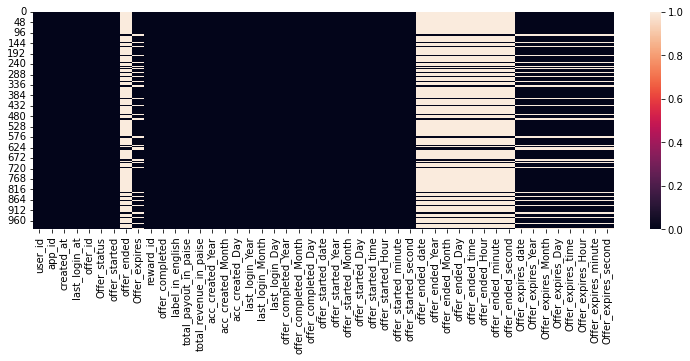

In [252]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[13,4])
sns.heatmap(data.isnull())
print(data.isnull().sum())

### Feature Engineering for analysis

We can create the columns "Gross_Profit", "Lifetime", "Reward_completion_time" from the data. 

In [253]:
data['gross_profit'] = data['total_revenue_in_paise']-data['total_payout_in_paise']

#Since the account created and last login are in same month and year, we can calculate the difference with the days.
data['lifetime'] = data['last_login_Day']-data['acc_created_Day']

#We can use the same for calculating reward_completion time, since the offer started and completion happened in same month and year.
data['reward_completion_days'] = data['offer_ended_date']- data['offer_started_date']
data['reward_completion_days'] = data['reward_completion_days']/np.timedelta64(1,'D')

data['reward_completion_time'] = data['offer_ended'] - data['offer_started']
#Converting the value to hours
for i in range(0,len(data['reward_completion_time'])):
    data['reward_completion_time'][i] = (data['reward_completion_time'][i].total_seconds())/3600

In [254]:
data.sample(5)

,user_id,app_id,created_at,last_login_at,offer_id,Offer_status,offer_started,offer_ended,Offer_expires,reward_id,offer_completed,label_in_english,total_payout_in_paise,total_revenue_in_paise,acc_created_Year,acc_created_Month,acc_created_Day,last_login_Year,last_login_Month,last_login_Day,offer_completed_Year,offer_completed_Month,offer_completed_Day,offer_started_date,offer_started_Year,offer_started_Month,offer_started_Day,offer_started_time,offer_started_Hour,offer_started_minute,offer_started_second,offer_ended_date,offer_ended_Year,offer_ended_Month,offer_ended_Day,offer_ended_time,offer_ended_Hour,offer_ended_minute,offer_ended_second,Offer_expires_date,Offer_expires_Year,Offer_expires_Month,Offer_expires_Day,Offer_expires_time,Offer_expires_Hour,Offer_expires_minute,Offer_expires_second,gross_profit,lifetime,reward_completion_days,reward_completion_time
346,0e205d6d-d50b-4dba-a0cd-0355b4f2cc49,sikka_pro,2022-11-26,2022-11-29,2302,ONGOING,2022-11-28 05:43:45.592319+00:00,NaT,2022-11-30 05:43:45.596867+00:00,3569,2022-11-29,Complete Registration,600,5600,2022,11,26,2022,11,29,2022,11,29,2022-11-28,2022,11,28,05:43:45.592319,5,43,45,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-11-30,2022.0,11.0,30.0,05:43:45.596867,5.0,43.0,45.0,5000,3,NaN,NaN
179,792b3da8-618b-4bbe-996c-63f45820327a,sikka_pro,2022-11-26,2022-11-27,3183,ONGOING,2022-11-26 20:37:46.947442+00:00,NaT,2022-11-28 20:37:46.952388+00:00,3172,2022-11-26,Download,34,100,2022,11,26,2022,11,27,2022,11,26,2022-11-26,2022,11,26,20:37:46.947442,20,37,46,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-11-28,2022.0,11.0,28.0,20:37:46.952388,20.0,37.0,46.0,66,1,NaN,NaN
269,44f9c9f1-1ce1-4b04-8042-ddb1c548c589,sikka,2022-11-26,2022-11-29,3520,ONGOING,2022-11-28 06:11:13.570163+00:00,NaT,2022-11-30 06:11:13.577249+00:00,3416,2022-11-28,Download,250,823,2022,11,26,2022,11,29,2022,11,28,2022-11-28,2022,11,28,06:11:13.570163,6,11,13,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-11-30,2022.0,11.0,30.0,06:11:13.577249,6.0,11.0,13.0,573,3,NaN,NaN
515,417bcb37-44cf-43c3-ba51-5d39c825caf7,sikka_pro,2022-11-26,2022-11-29,2838,ONGOING,2022-11-29 09:30:42.164276+00:00,NaT,2022-12-01 09:30:42.171105+00:00,3702,2022-11-27,Register,600,2000,2022,11,26,2022,11,29,2022,11,27,2022-11-29,2022,11,29,09:30:42.164276,9,30,42,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-12-01,2022.0,12.0,1.0,09:30:42.171105,9.0,30.0,42.0,1400,3,NaN,NaN
540,55e70808-0ed9-44fd-9d87-819ba9dc4d3e,sikka,2022-11-26,2022-11-29,2328,ONGOING,2022-11-27 06:22:03.916583+00:00,NaT,2022-11-29 06:22:03.921976+00:00,3702,2022-11-26,Register,600,2000,2022,11,26,2022,11,29,2022,11,26,2022-11-27,2022,11,27,06:22:03.916583,6,22,3,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,2022-11-29,2022.0,11.0,29.0,06:22:03.921976,6.0,22.0,3.0,1400,3,NaN,NaN


In [255]:
data.shape

(1000, 51)

### Data Visualization

sikka_pro    692
sikka        308
Name: app_id, dtype: int64


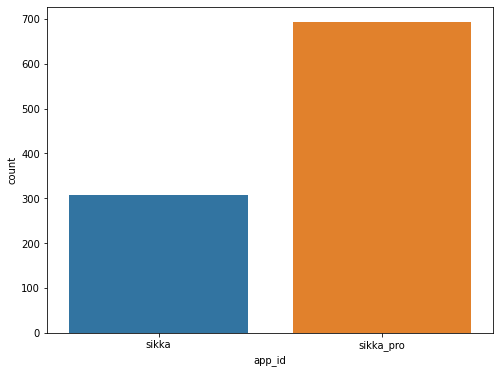

sikka_pro    692
sikka        308
Name: app_id, dtype: int64


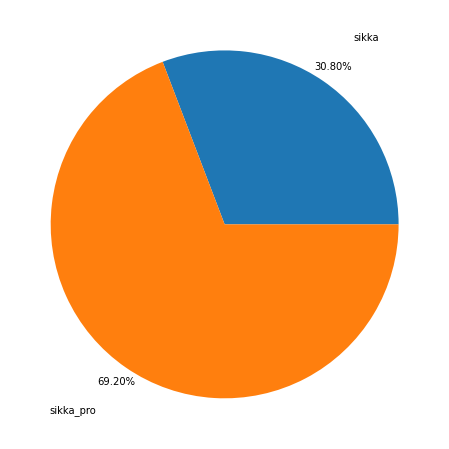

In [220]:
plt.figure(figsize = [8,6])
print(data['app_id'].value_counts())
sns.countplot(data['app_id'])
plt.show()
plt.figure(figsize = [9,8])
print(data['app_id'].value_counts())
data.groupby('app_id').size().plot.pie(pctdistance=1.1,labeldistance=1.3, autopct='%.2f%%',ylabel ='')
plt.show()

We can see that the number of records in data for each app users are different. This may cause bias effect.

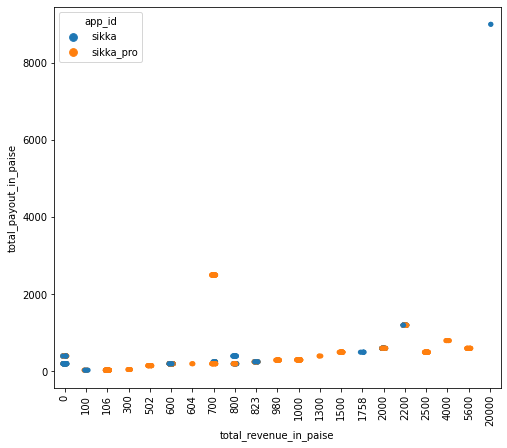

In [221]:
plt.figure(figsize = [8,7])
sns.stripplot( 'total_revenue_in_paise', 'total_payout_in_paise',data = data, hue = 'app_id')
plt.xticks(rotation = 90)
plt.show()

<AxesSubplot:xlabel='reward_completion_time', ylabel='reward_completion_days'>

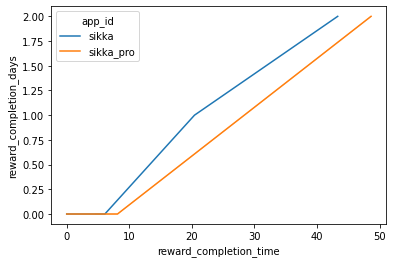

In [222]:
plt.figure(figsize = [8,7])
sns.lineplot('reward_completion_time','reward_completion_days',data = data,hue ='app_id')

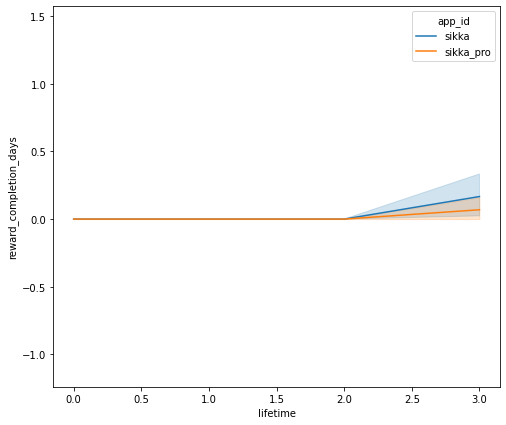

In [246]:
import pylab as p

plt.figure(figsize = [8,7])
sns.lineplot('lifetime','reward_completion_days',data = data,hue ='app_id')
p.gca().set_aspect('equal', adjustable='datalim')
plt.show()

In [223]:
data.to_csv("new_analytics_data_sikka.csv", index = False)